In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

print("Hola")

d:\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Hola


In [3]:
# Cargar los datos
data = pd.read_csv('preProcess/conteo_lenguajes_por_año_lk.csv')
years = data['Año'].values  # Guardar los años
language_names = data.columns[1:]  # Guardar los nombres de los lenguajes (excluyendo la columna 'Año')
data = data.drop(columns=['Año'])  # Elimina la columna 'Año' para solo usar los conteos
data

,Lua,Node.js,Haskell,JavaScript,Scala,C,C#,R,Assembly,Visual Basic 6,...,Python,TypeScrip,Clojure,Delphi,COBOL,VB.NET,Solidity,Crystal,Bash/Shell,MATLAB
0,0.000000,0.037805,0.003612,0.121671,0.007118,0.034113,0.067902,0.007251,0.000000,0.000000,...,0.054568,0.000000,0.002470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.007493,0.000000,0.004680,0.164967,0.009440,0.050294,0.089973,0.011784,0.013147,0.007637,...,0.084405,0.000000,0.002820,0.000000,0.000000,0.016392,0.000000,0.000000,0.000000,0.000000
2,0.005627,0.000000,0.004038,0.112600,0.007042,0.037149,0.055499,0.009910,0.011860,0.006356,...,0.062510,0.000000,0.002125,0.000000,0.000000,0.010818,0.000000,0.000000,0.064112,0.000000
3,0.000000,0.000000,0.000000,0.134434,0.007512,0.040901,0.061513,0.011460,0.013242,0.000000,...,0.082730,0.000000,0.002847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.004243,0.134797,0.007125,0.043357,0.062641,0.011417,0.012337,0.000000,...,0.087801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.063212,0.003952,0.121084,0.004854,0.039156,0.051934,0.009456,0.010466,0.000000,...,0.089913,0.000000,0.003507,0.003911,0.000987,0.000000,0.000000,0.001053,0.050581,0.000000
6,0.007795,0.000000,0.004288,0.126276,0.004995,0.037228,0.054061,0.008994,0.010569,0.000000,...,0.092865,0.000008,0.002909,0.006283,0.001262,0.000000,0.002803,0.000924,0.056162,0.007920
7,0.011457,0.000000,0.003927,0.119615,0.005136,0.036371,0.051944,0.007895,0.010205,0.000000,...,0.092663,0.000002,0.002373,0.006078,0.000000,0.000000,0.002435,0.000835,0.000000,0.007169
8,0.000000,0.000000,0.000000,0.132007,0.000000,0.092224,0.000000,0.016275,0.000000,0.000000,...,0.133816,0.000000,0.000000,0.000000,0.003617,0.000000,0.000000,0.001808,0.000000,0.010850


In [4]:
# Normalizar los datos
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [5]:
# Función para crear secuencias de datos
def create_sequences(data, sequence_length=3):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

In [6]:
# Crear secuencias
sequence_length = 3
X, y = create_sequences(data_normalized, sequence_length)

# Dividir datos en entrenamiento y prueba
train_size = int(len(X) * 0.75)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(len(language_names)))  # Salida con tantas neuronas como lenguajes
model.compile(optimizer='adam', loss='mse')

d:\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=2000, batch_size=1, verbose=1)

Epoch 1/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4781e-15 
Epoch 2/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3899e-15 
Epoch 3/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6363e-15 
Epoch 4/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1452e-15 
Epoch 5/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6558e-15 
Epoch 6/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4025e-15 
Epoch 7/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8088e-15 
Epoch 8/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6263e-15 
Epoch 9/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6669e-15 
Epoch 10/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9963e-15 
Epoch 11/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8064e-15 
Epoch 12/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7715e-15 
Epoch 13/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0136e-15 
Epoch 14/2000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2188e-15 
Epoch 15/2000
4

In [51]:
# Predicciones y evaluación del modelo en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [52]:
# Cálculo del error cuadrático medio (MSE)
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Error cuadrático medio (MSE) en el conjunto de prueba: {mse}')

Error cuadrático medio (MSE) en el conjunto de prueba: 0.0005112396286684391


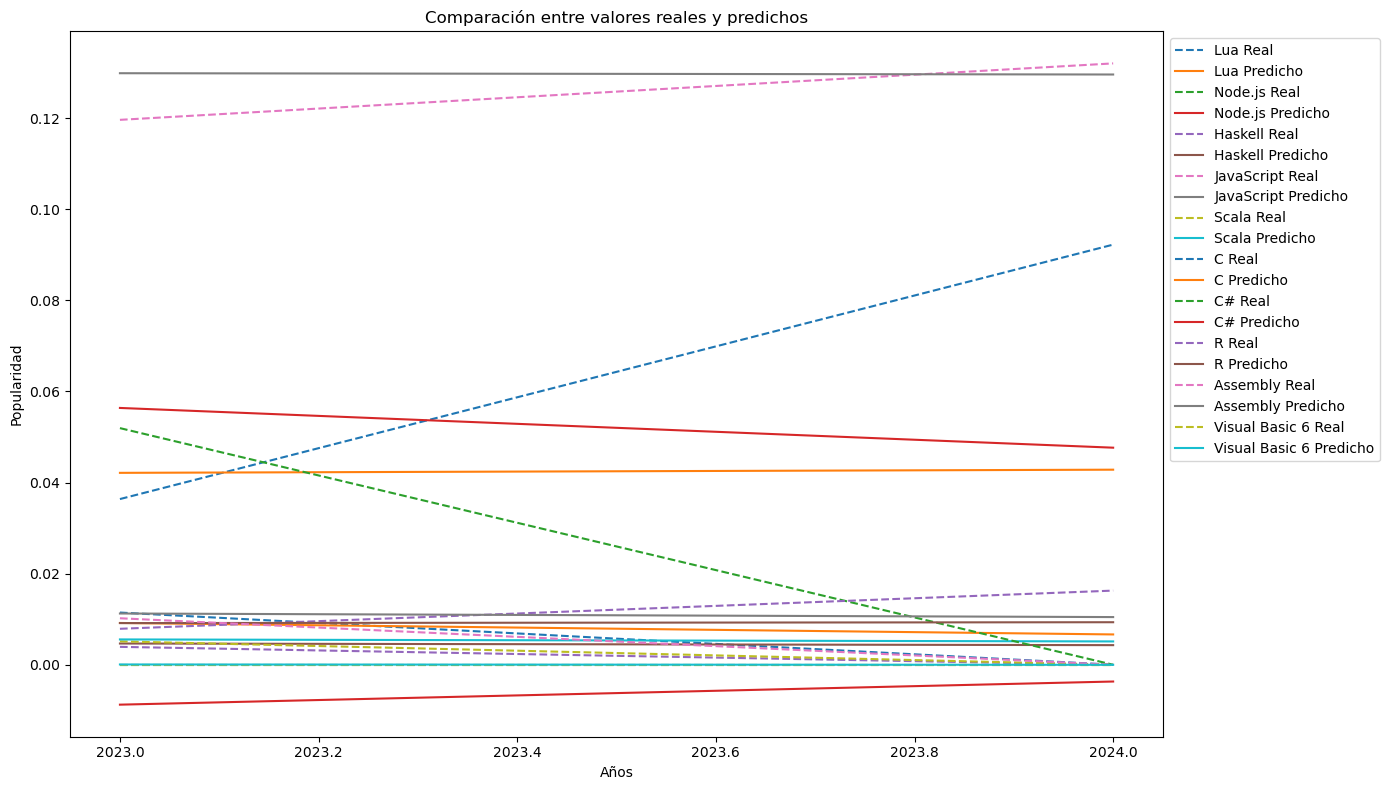

In [53]:

# Graficación de resultados de prueba y predicciones
test_years = years[-len(X_test):]  # Años correspondientes al conjunto de prueba
plt.figure(figsize=(14, 8))
for i in range(10):  # Graficar para los primeros 10 lenguajes
    plt.plot(test_years, y_test_inv[:, i], label=f'{language_names[i]} Real', linestyle='--')
    plt.plot(test_years, y_pred_inv[:, i], label=f'{language_names[i]} Predicho')
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Años')
plt.ylabel('Popularidad')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [54]:

# Predicción para varios años futuros (ej. 5 años)
years_to_predict = 5
current_sequence = X[-1]
future_predictions = []

In [55]:
for _ in range(years_to_predict):
    prediction = model.predict(np.expand_dims(current_sequence, axis=0))
    predicted_usage = scaler.inverse_transform(prediction).flatten()
    future_predictions.append(predicted_usage)
    next_sequence = np.vstack([current_sequence[1:], prediction])
    current_sequence = next_sequence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [56]:
# Crear una lista de años futuros para las predicciones
future_years = list(range(years[-1] + 1, years[-1] + 1 + years_to_predict))

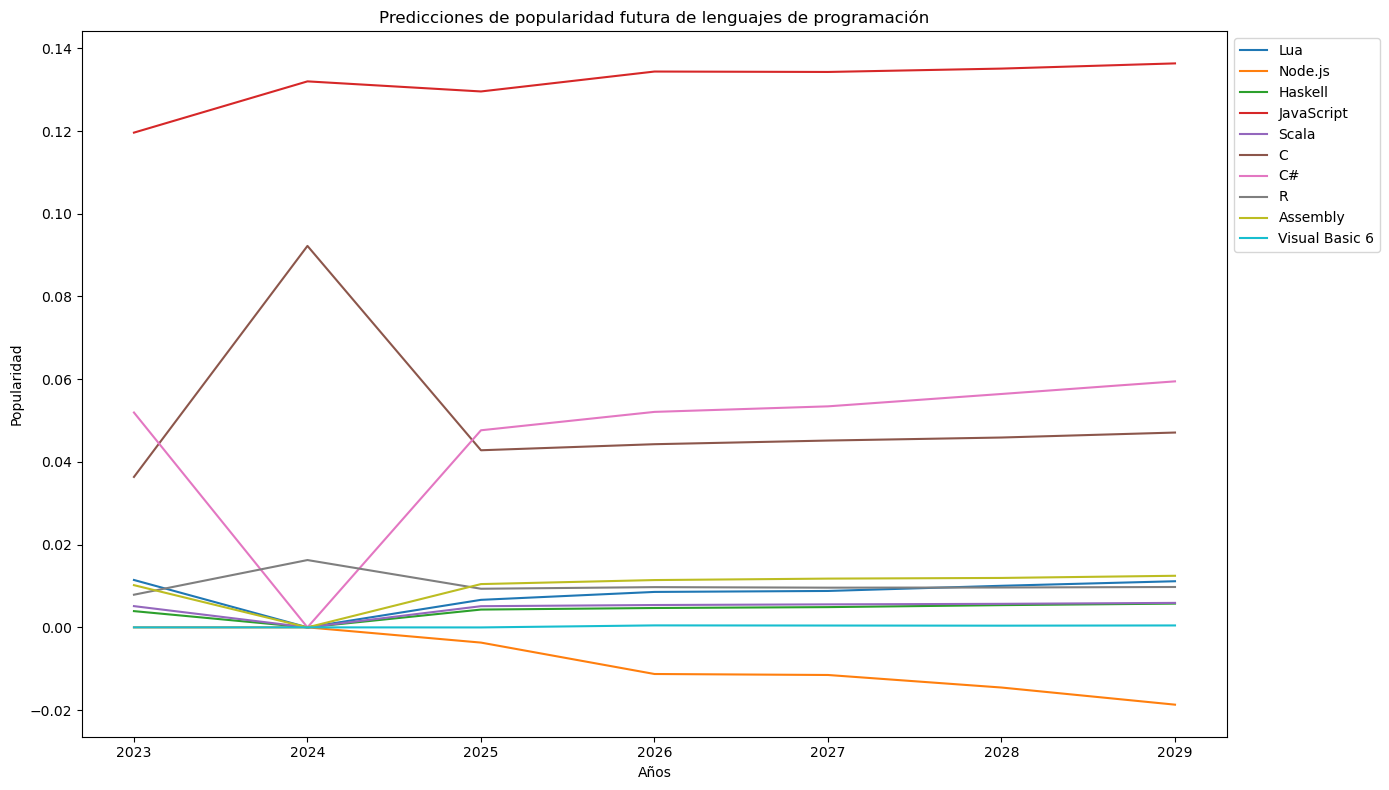

In [57]:
# Graficar predicciones futuras
future_predictions = np.array(future_predictions)
plt.figure(figsize=(14, 8))
for i in range(10):  # Graficar para los primeros 10 lenguajes
    plt.plot(np.concatenate([test_years, future_years]), 
             np.concatenate([y_test_inv[:, i], future_predictions[:, i]]), label=language_names[i])
plt.title('Predicciones de popularidad futura de lenguajes de programación')
plt.xlabel('Años')
plt.ylabel('Popularidad')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [58]:
# Agregar los años reales y los predichos en un único DataFrame
years_all = np.concatenate([years, future_years])
data_all = np.concatenate([data.values, future_predictions])

In [59]:
# Crear un DataFrame para almacenar los rankings anuales
ranking_df = pd.DataFrame(data_all, columns=language_names, index=years_all)

In [60]:
# Mostrar el ranking de los lenguajes más populares desde 2016 en adelante
print("Ranking de los lenguajes más populares desde el 2016 hasta el último año predicho:")
for year in range(2016, years_all[-1] + 1):
    print(f"\nAño {year}:")
    year_rank = ranking_df.loc[year].sort_values(ascending=False)
    print(year_rank.head(10))  # Mostrar los 10 lenguajes más populares para ese año

Ranking de los lenguajes más populares desde el 2016 hasta el último año predicho:

Año 2016:
JavaScript    0.121671
SQL           0.097639
Java          0.079716
C#            0.067902
PHP           0.056781
Python        0.054568
C++           0.042604
Node.js       0.037805
C             0.034113
Ruby          0.019474
Name: 2016, dtype: float64

Año 2017:
JavaScript    0.164967
SQL           0.135248
Java          0.104742
C#            0.089973
Python        0.084405
PHP           0.074208
C++           0.058811
C             0.050294
TypeScript    0.025154
Ruby          0.023972
Name: 2017, dtype: float64

Año 2018:
JavaScript    0.112600
SQL           0.091976
Java          0.073138
Bash/Shell    0.064112
Python        0.062510
C#            0.055499
PHP           0.049563
C++           0.040917
C             0.037149
TypeScript    0.028056
Name: 2018, dtype: float64

Año 2019:
JavaScript               0.134434
HTML/CSS                 0.125915
SQL                      0.107931


In [61]:
# Comparación entre predicciones y valores reales del conjunto de prueba
test_years = years[-len(X_test):]  # Años de prueba
test_results_df = pd.DataFrame(y_test_inv, columns=language_names, index=test_years)
pred_results_df = pd.DataFrame(y_pred_inv, columns=language_names, index=test_years)

In [62]:
# Calcular los rankings para los valores reales y predichos en el conjunto de prueba
print("\nComparación entre los valores reales y predichos en el conjunto de prueba:")
for year in test_years:
    print(f"\nAño {year}:")
    real_rank = test_results_df.loc[year].sort_values(ascending=False)
    pred_rank = pred_results_df.loc[year].sort_values(ascending=False)
    print("\nRanking Real:")
    print(real_rank.head(10))
    print("\nRanking Predicho:")
    print(pred_rank.head(10))


Comparación entre los valores reales y predichos en el conjunto de prueba:

Año 2023:

Ranking Real:
JavaScript    0.119615
HTML/CSS      0.099615
Python        0.092663
SQL           0.091441
TypeScript    0.073011
Java          0.057449
C#            0.051944
C++           0.042155
C             0.036371
PHP           0.034941
Name: 2023, dtype: float64

Ranking Predicho:
JavaScript    0.129851
HTML/CSS      0.115911
Python        0.091987
SQL           0.091621
TypeScript    0.070780
Bash/Shell    0.063946
C#            0.056374
Java          0.055076
C             0.042125
C++           0.039023
Name: 2023, dtype: float32

Año 2024:

Ranking Real:
SQL           0.198915
Java          0.150090
Python        0.133816
JavaScript    0.132007
C             0.092224
TypeScript    0.066908
PHP           0.050633
Go            0.039783
R             0.016275
Kotlin        0.016275
Name: 2024, dtype: float64

Ranking Predicho:
JavaScript    0.129569
HTML/CSS      0.106722
Python        0.0